In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_excel(r"C:\Users\HP\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")

In [3]:
test_data=pd.read_excel(r"C:\Users\HP\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Test_set.xlsx")

In [4]:
sample=pd.read_excel(r"C:\Users\HP\Downloads\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Sample_submission.xlsx")

In [5]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [7]:
sample

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


In [8]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
sample.describe()

,Price
count,2671.000000
mean,20159.514414
std,5005.399225
min,10138.000000
25%,16469.500000
50%,19582.000000
75%,23476.500000
max,64881.000000


In [10]:
test_data.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [13]:
sample.isnull().sum()

Price    0
dtype: int64

In [14]:
#Splitting the date of journey for train data 
train_data.Date_of_Journey.str.split('/')
train_data.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [15]:
train_data['Date']=train_data.Date_of_Journey.str[0]
train_data['Month']=train_data.Date_of_Journey.str[1]
train_data['Year']=train_data.Date_of_Journey.str[2]

In [16]:
#Repeating the process for test
test_data.Date_of_Journey.str.split('/')
test_data.Date_of_Journey

0        6/06/2019
1       12/05/2019
2       21/05/2019
3       21/05/2019
4       24/06/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 2671, dtype: object

In [17]:
test_data['Date']=test_data.Date_of_Journey.str[0]
test_data['Month']=test_data.Date_of_Journey.str[1]
test_data['Year']=test_data.Date_of_Journey.str[2]

In [18]:
#mergind them 
train_data['source']='train'
test_data['source']='test'
df=pd.concat([train_data,test_data],ignore_index=True)

In [19]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,2,4,/,train
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,/,0,train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,/,0,train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,1,2,/,train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,0,1,/,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,/,0,test
13350,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,2,7,/,test
13351,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,/,0,test
13352,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,/,0,test


In [20]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'source'],
      dtype='object')

In [21]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  object 
 12  Month            13354 non-null  object 
 13  Year             13354 non-null  object 
 14  source           13354 non-null  object 
dtypes: float64(1), object(14)
memory usage: 1.5+ MB


All the data is object type except one , we would change it to integer.

In [23]:
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
source              object
dtype: object

In [24]:
df.shape

(13354, 15)

In [25]:
#Transforming the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        print(i)
        df[i]=le.fit_transform(df[i])

Airline
Date_of_Journey
Source
Destination
Route
Dep_Time
Arrival_Time
Duration
Total_Stops
Additional_Info
Date
Month
Year
source


In [26]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,source
0,3,24,0,5,18,211,264,242,4,8,3897.0,2,4,0,1
1,1,6,3,0,87,31,986,342,1,8,7662.0,1,0,1,1
2,4,43,2,1,122,70,468,106,1,8,13882.0,5,0,1,1
3,3,10,3,0,95,164,1430,317,0,8,6218.0,1,2,0,1
4,3,0,0,5,29,149,1331,309,0,8,13302.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,39,3,0,76,190,1283,168,0,8,NaN,4,0,1,0
13350,3,28,3,0,67,122,1097,239,4,8,NaN,2,7,0,0
13351,4,36,2,1,108,205,464,332,0,8,NaN,4,0,1,0
13352,1,36,2,1,108,16,1212,62,0,8,NaN,4,0,1,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13354 entries, 0 to 13353
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  int32  
 1   Date_of_Journey  13354 non-null  int32  
 2   Source           13354 non-null  int32  
 3   Destination      13354 non-null  int32  
 4   Route            13354 non-null  int32  
 5   Dep_Time         13354 non-null  int32  
 6   Arrival_Time     13354 non-null  int32  
 7   Duration         13354 non-null  int32  
 8   Total_Stops      13354 non-null  int32  
 9   Additional_Info  13354 non-null  int32  
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
 14  source           13354 non-null  int32  
dtypes: float64(1), int32(14)
memory usage: 834.8 KB


From the above, we are able to deduce that prices still has a lot of null values. Hence, we need to fix it.

In [28]:
df['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
13349        NaN
13350        NaN
13351        NaN
13352        NaN
13353        NaN
Name: Price, Length: 13354, dtype: float64

In [29]:
df['Price'].fillna(df['Price'].mode()[0],inplace=True)

In [30]:
df['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
13349    10262.0
13350    10262.0
13351    10262.0
13352    10262.0
13353    10262.0
Name: Price, Length: 13354, dtype: float64

In [31]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,source
0,3,24,0,5,18,211,264,242,4,8,3897.0,2,4,0,1
1,1,6,3,0,87,31,986,342,1,8,7662.0,1,0,1,1
2,4,43,2,1,122,70,468,106,1,8,13882.0,5,0,1,1
3,3,10,3,0,95,164,1430,317,0,8,6218.0,1,2,0,1
4,3,0,0,5,29,149,1331,309,0,8,13302.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,1,39,3,0,76,190,1283,168,0,8,10262.0,4,0,1,0
13350,3,28,3,0,67,122,1097,239,4,8,10262.0,2,7,0,0
13351,4,36,2,1,108,205,464,332,0,8,10262.0,4,0,1,0
13352,1,36,2,1,108,16,1212,62,0,8,10262.0,4,0,1,0


Now that our dataset is good. We can begin to work

In [32]:
df.corr()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,source
Airline,1.000000,0.021171,-0.018547,0.022130,0.020447,-0.030363,-0.018385,0.028354,0.037978,-0.058533,-0.033875,0.011208,0.004773,0.002516,-0.009440
Date_of_Journey,0.021171,1.000000,0.163327,-0.270748,0.270308,-0.011017,-0.011680,-0.002389,-0.043478,0.013295,-0.032989,0.930902,-0.276895,0.497428,0.002341
Source,-0.018547,0.163327,1.000000,-0.589710,0.410124,0.054033,0.016779,-0.185234,-0.223059,-0.022219,0.014553,0.169636,-0.123209,0.153386,-0.003115
Destination,0.022130,-0.270748,-0.589710,1.000000,-0.475881,-0.058119,-0.029959,0.012843,0.336460,0.027398,-0.063357,-0.256439,0.151425,-0.202252,0.000901
Route,0.020447,0.270308,0.410124,-0.475881,1.000000,-0.090364,0.009594,-0.057312,-0.447204,0.036037,0.147598,0.229627,-0.075776,0.142416,0.006229
Dep_Time,-0.030363,-0.011017,0.054033,-0.058119,-0.090364,1.000000,-0.029682,0.046499,0.051578,-0.056115,0.003572,-0.004739,-0.006363,0.004871,-0.007921
Arrival_Time,-0.018385,-0.011680,0.016779,-0.029959,0.009594,-0.029682,1.000000,0.032591,-0.099455,0.012747,0.026469,-0.010085,0.001650,-0.011047,-0.009465
Duration,0.028354,-0.002389,-0.185234,0.012843,-0.057312,0.046499,0.032591,1.000000,0.168697,0.074230,-0.125963,-0.010127,0.018710,-0.011614,0.009448
Total_Stops,0.037978,-0.043478,-0.223059,0.336460,-0.447204,0.051578,-0.099455,0.168697,1.000000,0.162122,-0.509095,-0.067393,0.062951,-0.045358,0.007957
Additional_Info,-0.058533,0.013295,-0.022219,0.027398,0.036037,-0.056115,0.012747,0.074230,0.162122,1.000000,-0.056180,0.010193,0.008671,0.021473,-0.024514


<AxesSubplot:>

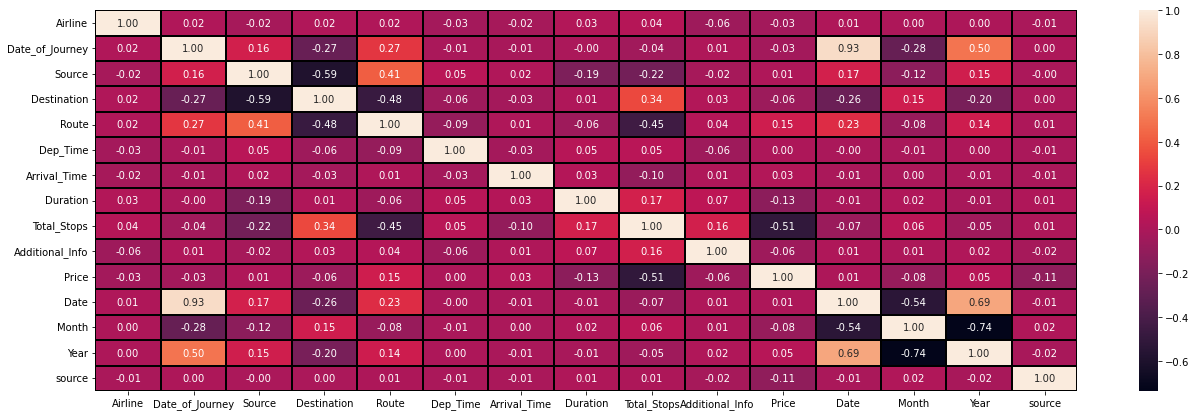

In [33]:
#correlation heatmap
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True,fmt="0.2f",linewidth=0.1,linecolor="black")

In [34]:
#checking for skewness
df.skew()

Airline            0.720924
Date_of_Journey   -0.065428
Source            -0.424151
Destination        1.247893
Route             -0.521328
Dep_Time           0.193459
Arrival_Time      -0.650988
Duration          -0.192160
Total_Stops        0.639492
Additional_Info   -1.784752
Price              1.822108
Date               0.705280
Month              0.670224
Year               0.430214
source            -1.500051
dtype: float64

<AxesSubplot:>

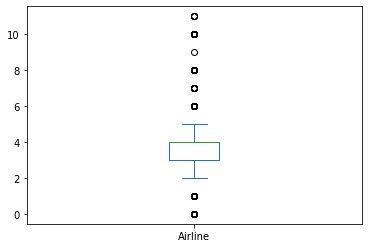

In [35]:
df['Airline'].plot.box()

<AxesSubplot:>

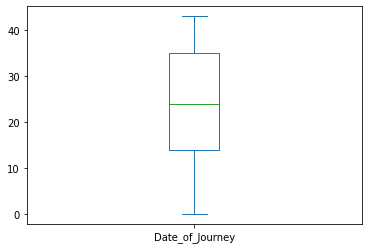

In [36]:
df['Date_of_Journey'].plot.box()

<AxesSubplot:>

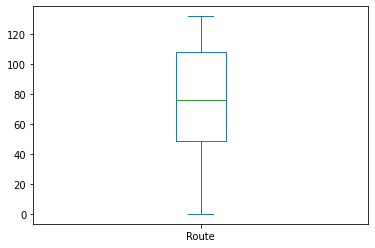

In [37]:
df['Route'].plot.box()

<AxesSubplot:>

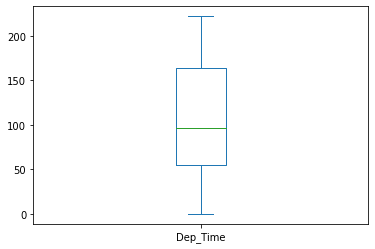

In [38]:
df['Dep_Time'].plot.box()

<AxesSubplot:>

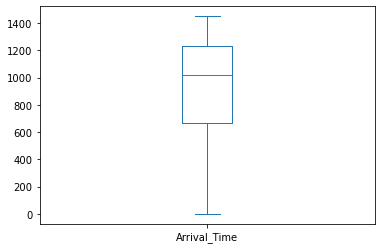

In [39]:
df['Arrival_Time'].plot.box()

<AxesSubplot:>

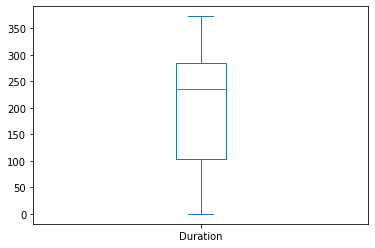

In [40]:
df['Duration'].plot.box()

<AxesSubplot:>

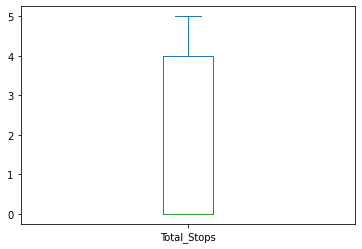

In [41]:
df['Total_Stops'].plot.box()

<AxesSubplot:>

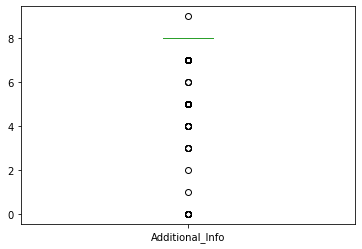

In [42]:
df['Additional_Info'].plot.box()

<AxesSubplot:>

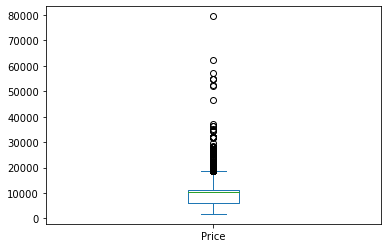

In [43]:
df['Price'].plot.box()

<AxesSubplot:>

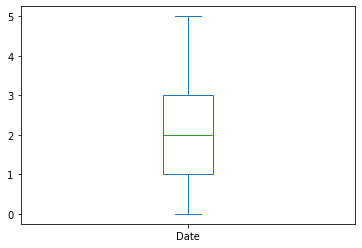

In [44]:
df['Date'].plot.box()

<AxesSubplot:>

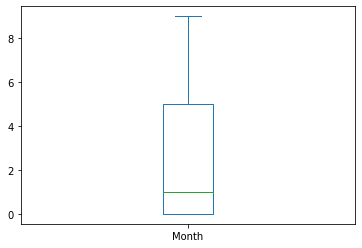

In [45]:
df['Month'].plot.box()

<AxesSubplot:>

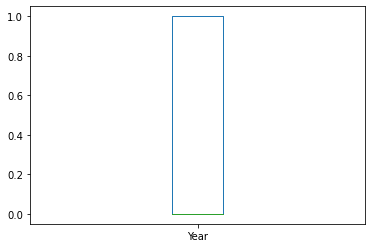

In [46]:
df['Year'].plot.box()

<AxesSubplot:>

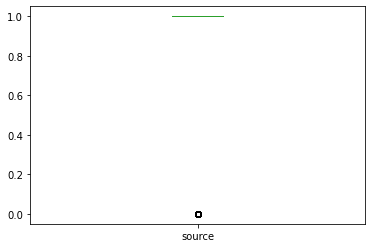

In [47]:
df['source'].plot.box()

In [48]:
#checking for outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z.all()

Airline            True
Date_of_Journey    True
Source             True
Destination        True
Route              True
Dep_Time           True
Arrival_Time       True
Duration           True
Total_Stops        True
Additional_Info    True
Price              True
Date               True
Month              True
Year               True
source             True
dtype: bool

Hence, there are no outliers in the dataset.

In [49]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               133
Dep_Time            223
Arrival_Time       1451
Duration            374
Total_Stops           6
Additional_Info      10
Price              1870
Date                  6
Month                10
Year                  2
source                2
dtype: int64

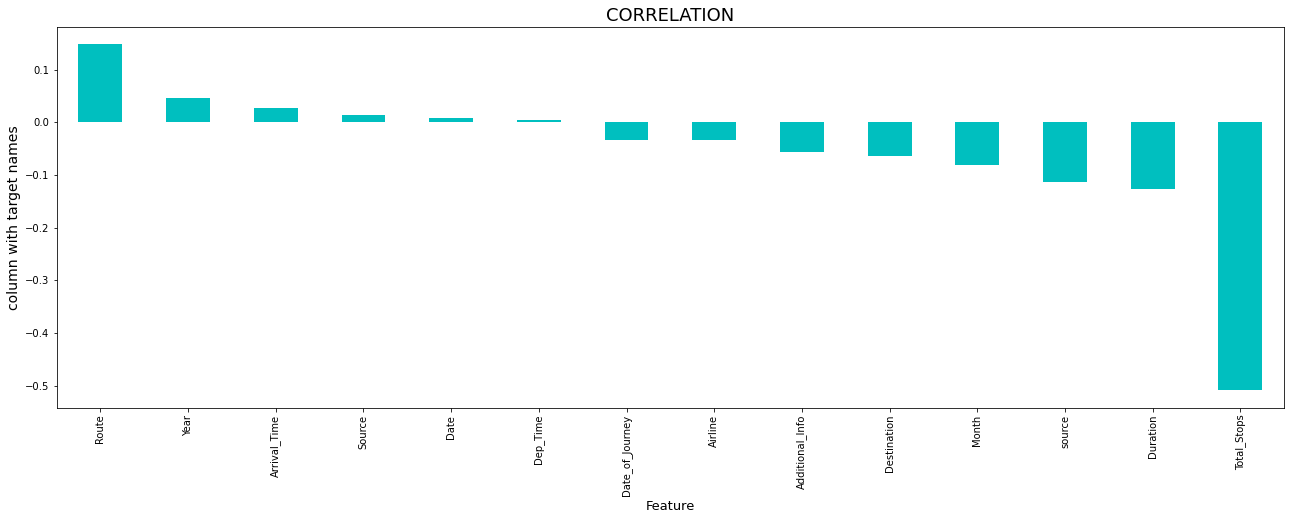

In [50]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=13)
plt.ylabel('column with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

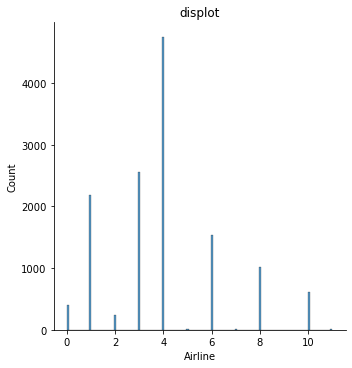

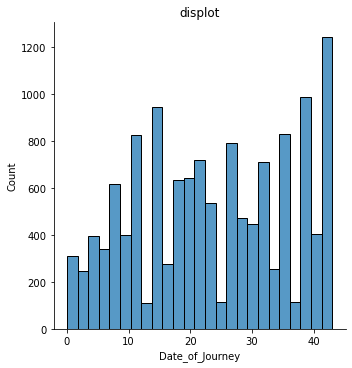

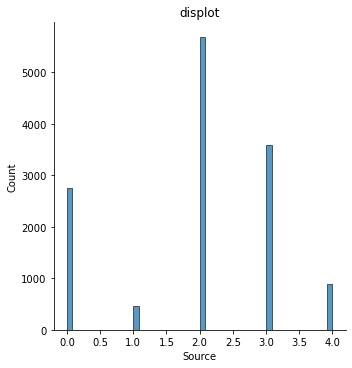

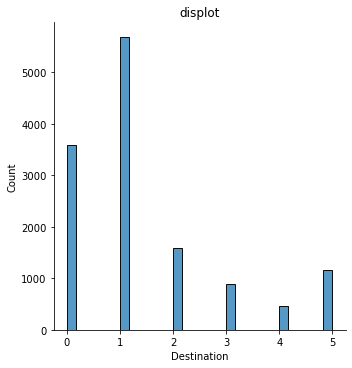

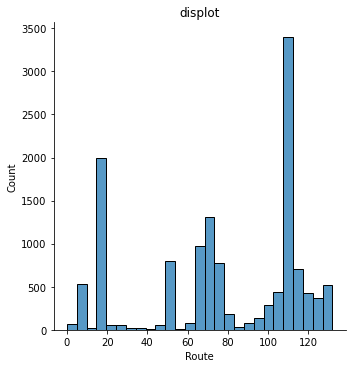

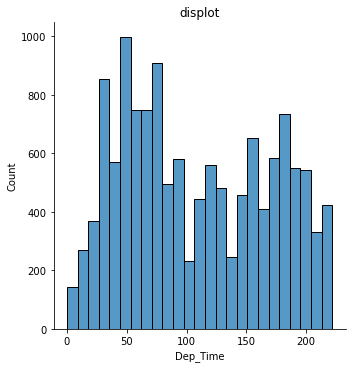

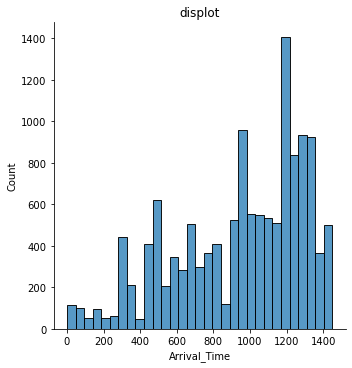

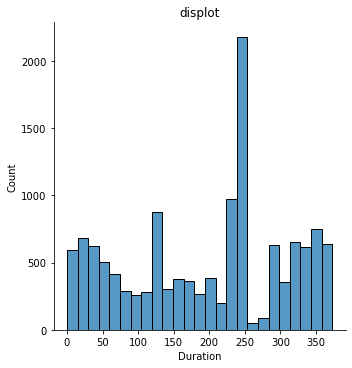

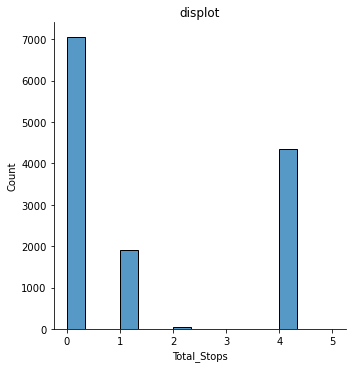

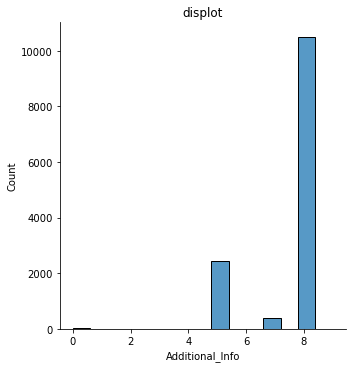

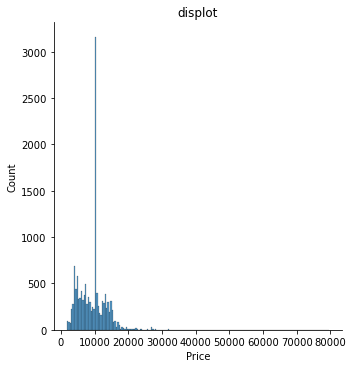

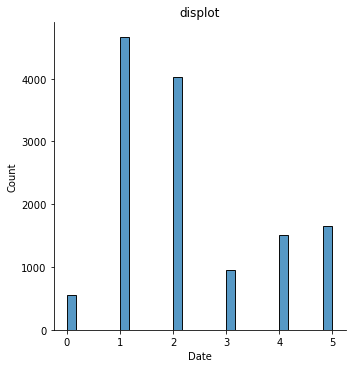

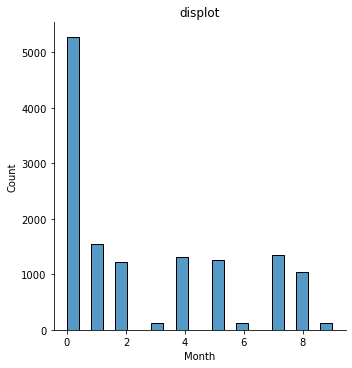

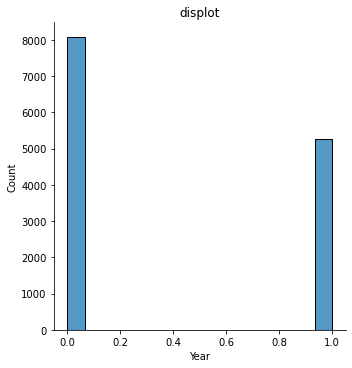

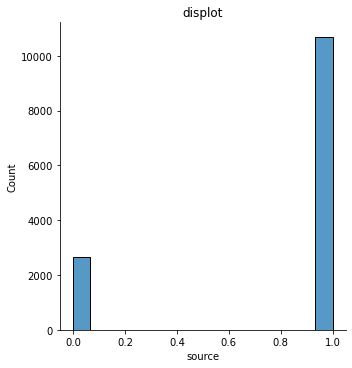

In [51]:
#creating a distplot for describe
for i in df.describe().columns:
    sns.displot(df[i].dropna())
    plt.title("displot")
    plt.show()

array([[<AxesSubplot:title={'center':'Airline'}>,
        <AxesSubplot:title={'center':'Date_of_Journey'}>,
        <AxesSubplot:title={'center':'Source'}>,
        <AxesSubplot:title={'center':'Destination'}>],
       [<AxesSubplot:title={'center':'Route'}>,
        <AxesSubplot:title={'center':'Dep_Time'}>,
        <AxesSubplot:title={'center':'Arrival_Time'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Additional_Info'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Date'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'source'}>, <AxesSubplot:>]],
      dtype=object)

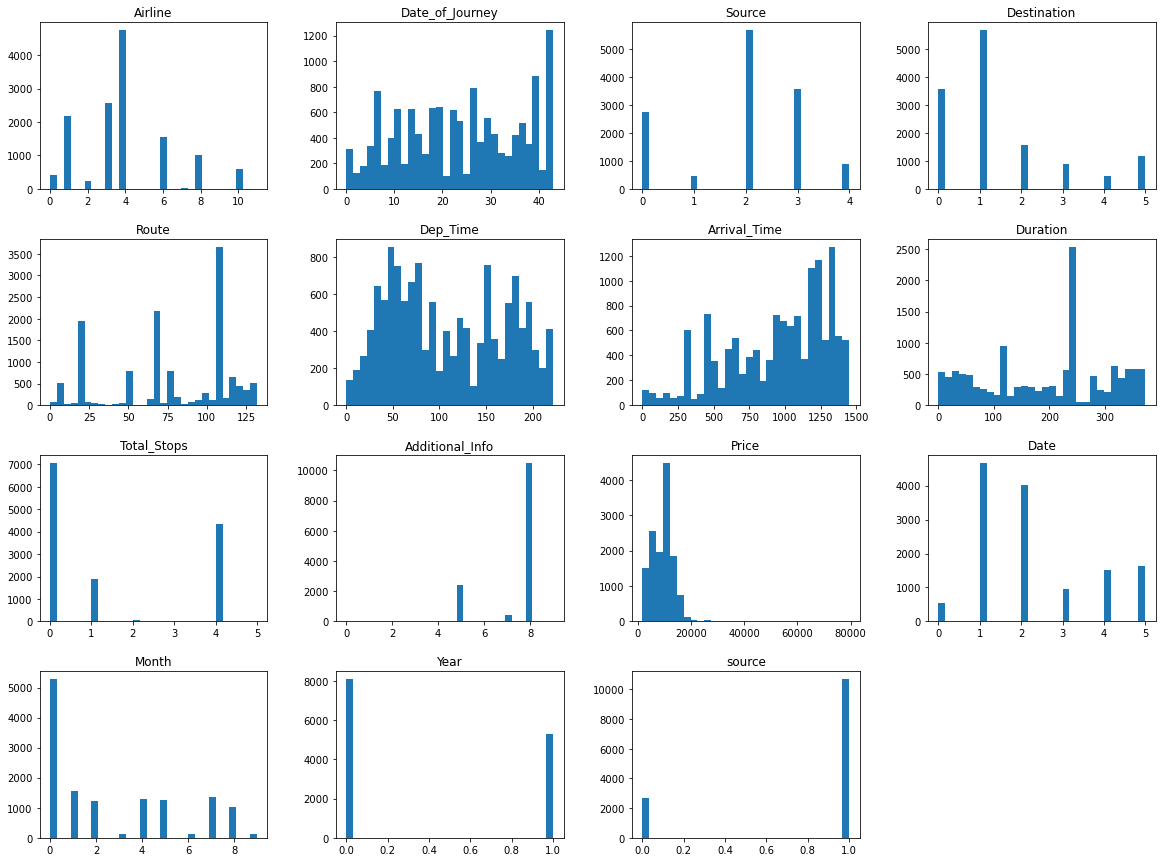

In [52]:
df.hist(grid=False,figsize=(20,15),bins=30)

array([[<AxesSubplot:xlabel='Airline', ylabel='Airline'>,
        <AxesSubplot:xlabel='Date_of_Journey', ylabel='Airline'>,
        <AxesSubplot:xlabel='Source', ylabel='Airline'>,
        <AxesSubplot:xlabel='Destination', ylabel='Airline'>,
        <AxesSubplot:xlabel='Route', ylabel='Airline'>,
        <AxesSubplot:xlabel='Dep_Time', ylabel='Airline'>,
        <AxesSubplot:xlabel='Arrival_Time', ylabel='Airline'>,
        <AxesSubplot:xlabel='Duration', ylabel='Airline'>,
        <AxesSubplot:xlabel='Total_Stops', ylabel='Airline'>,
        <AxesSubplot:xlabel='Additional_Info', ylabel='Airline'>,
        <AxesSubplot:xlabel='Price', ylabel='Airline'>,
        <AxesSubplot:xlabel='Date', ylabel='Airline'>,
        <AxesSubplot:xlabel='Month', ylabel='Airline'>,
        <AxesSubplot:xlabel='Year', ylabel='Airline'>,
        <AxesSubplot:xlabel='source', ylabel='Airline'>],
       [<AxesSubplot:xlabel='Airline', ylabel='Date_of_Journey'>,
        <AxesSubplot:xlabel='Date_of_Journey',

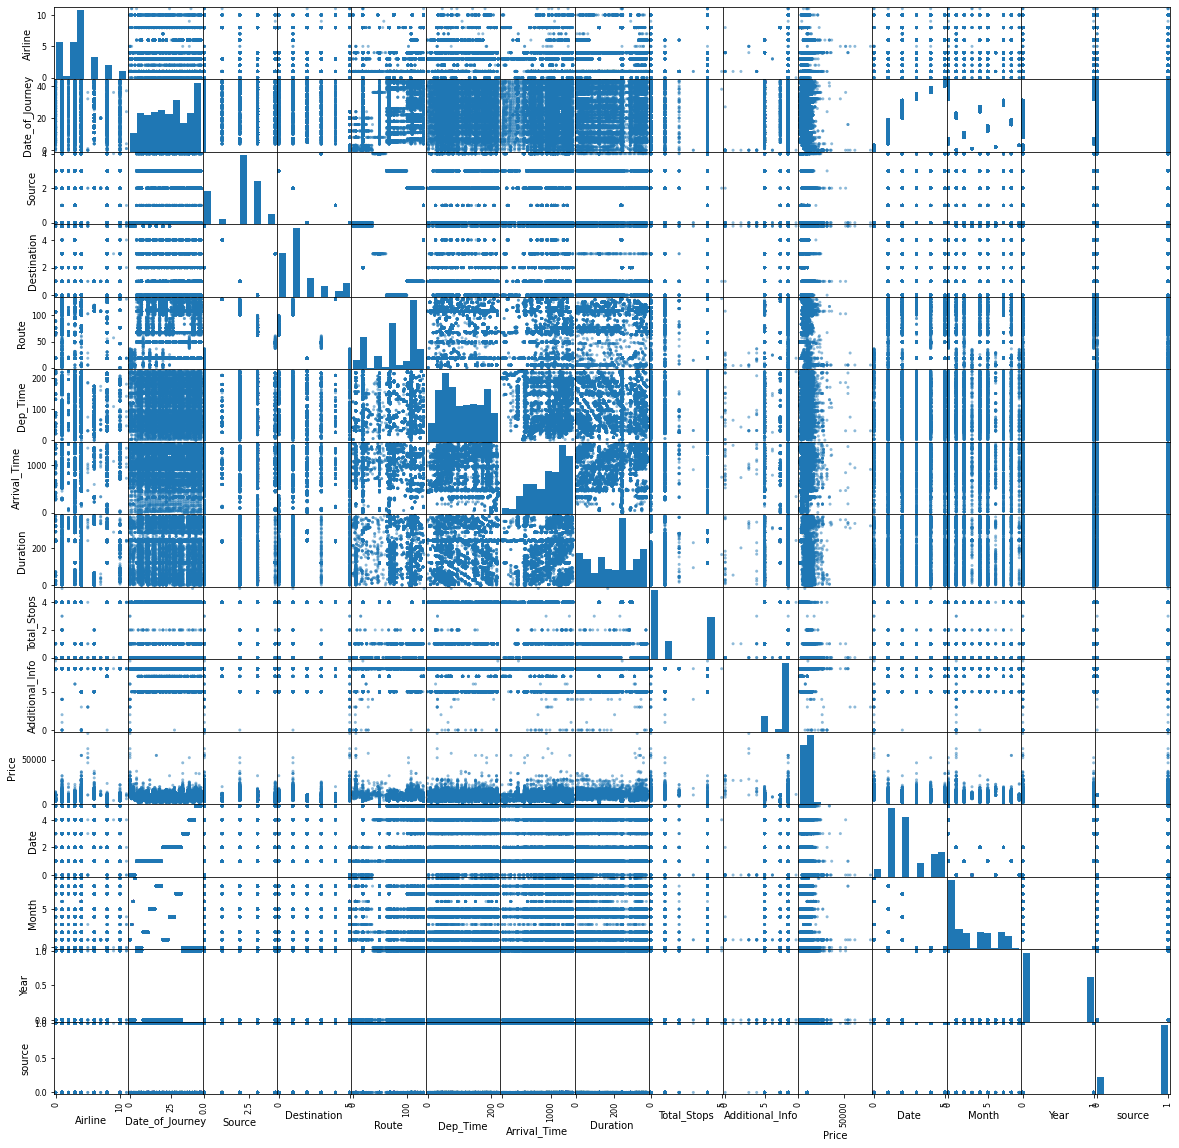

In [53]:
pd.plotting.scatter_matrix(df,figsize=(20,20))

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


4     4746
3     2564
1     2192
6     1543
8     1026
10     608
0      405
2      240
7       16
5        8
11       5
9        1
Name: Airline, dtype: int64

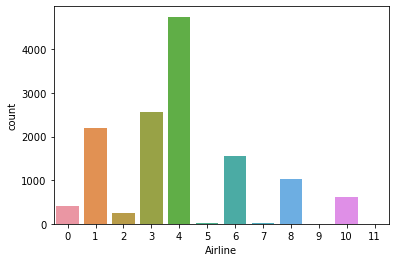

In [54]:
sns.countplot(df.Airline)
df['Airline'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


18    633
39    630
42    628
11    628
22    615
43    614
20    516
14    511
30    447
27    436
15    433
7     430
31    430
35    425
36    405
24    401
28    364
26    357
38    355
6     339
5     335
10    327
32    280
40    255
16    197
12    195
0     186
8     185
41    149
33    138
23    133
19    127
1     123
3     123
2     123
34    117
37    114
25    113
13    112
29    109
21    104
17     79
9      74
4      59
Name: Date_of_Journey, dtype: int64

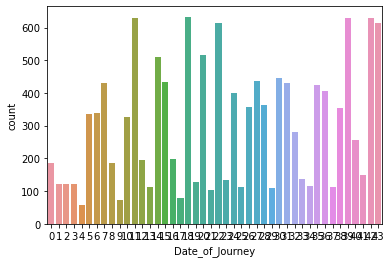

In [55]:
sns.countplot(df.Date_of_Journey)
df['Date_of_Journey'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    10683
0     2671
Name: source, dtype: int64

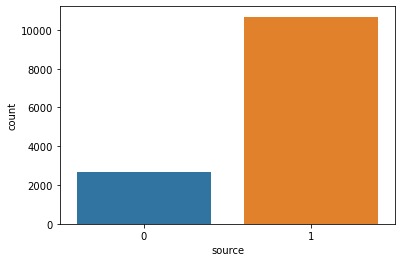

In [56]:
sns.countplot(df.source)
df['source'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    5682
0    3581
2    1582
5    1170
3     883
4     456
Name: Destination, dtype: int64

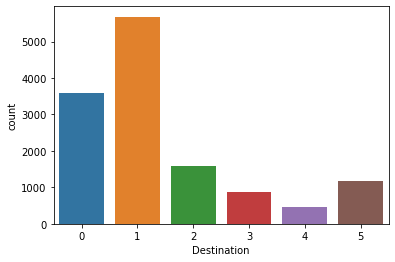

In [57]:
sns.countplot(df.Destination)
df['Destination'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


108    3000
18     1941
69     1232
67      896
49      785
       ... 
55        1
57        1
44        1
54        1
51        1
Name: Route, Length: 133, dtype: int64

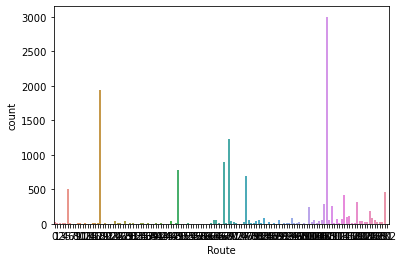

In [58]:
sns.countplot(df.Route)
df['Route'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


172    288
151    275
77     265
46     240
47     239
      ... 
212      1
99       1
204      1
13       1
213      1
Name: Dep_Time, Length: 223, dtype: int64

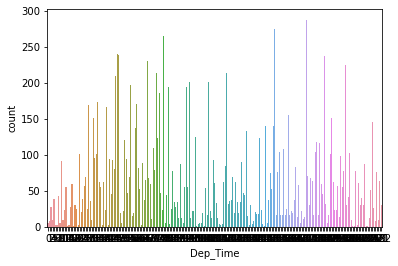

In [59]:
sns.countplot(df.Dep_Time)
df['Dep_Time'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1180    536
1308    466
1212    434
1067    185
956     159
       ... 
993       1
675       1
562       1
124       1
623       1
Name: Arrival_Time, Length: 1451, dtype: int64

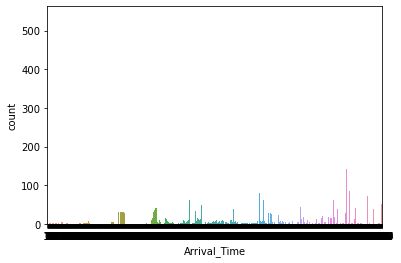

In [60]:
sns.countplot(df.Arrival_Time)
df['Arrival_Time'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


242    672
121    493
241    432
243    418
239    399
      ... 
227      1
261      1
254      1
271      1
259      1
Name: Duration, Length: 374, dtype: int64

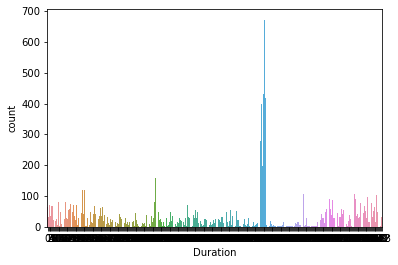

In [61]:
sns.countplot(df.Duration)
df['Duration'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    7056
4    4340
1    1899
2      56
3       2
5       1
Name: Total_Stops, dtype: int64

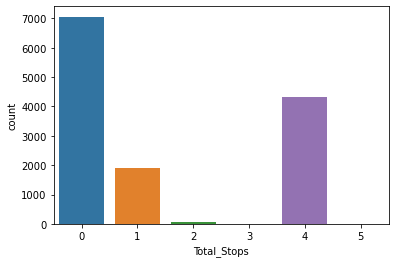

In [62]:
sns.countplot(df.Total_Stops)
df['Total_Stops'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


8    10493
5     2426
7      396
0       20
4        8
3        5
6        3
1        1
9        1
2        1
Name: Additional_Info, dtype: int64

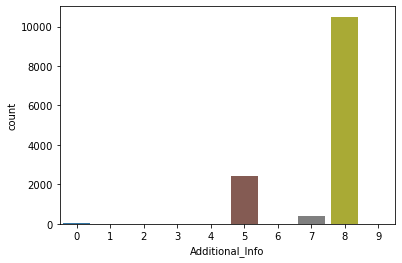

In [63]:
sns.countplot(df.Additional_Info)
df['Additional_Info'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


10262.0    2929
10844.0     212
7229.0      162
4804.0      160
4823.0      131
           ... 
14153.0       1
8488.0        1
7826.0        1
6315.0        1
12648.0       1
Name: Price, Length: 1870, dtype: int64

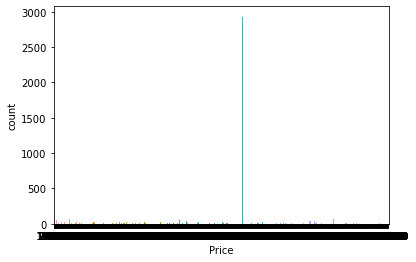

In [64]:
sns.countplot(df.Price)
df['Price'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4664
2    4025
5    1646
4    1504
3     960
0     555
Name: Date, dtype: int64

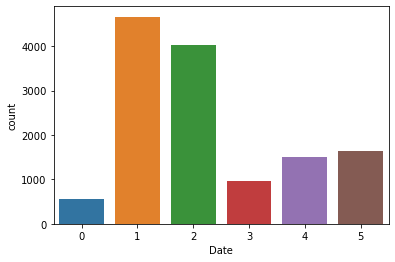

In [65]:
sns.countplot(df.Date)
df['Date'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    5273
1    1554
7    1350
4    1307
5    1251
2    1214
8    1036
6     123
9     123
3     123
Name: Month, dtype: int64

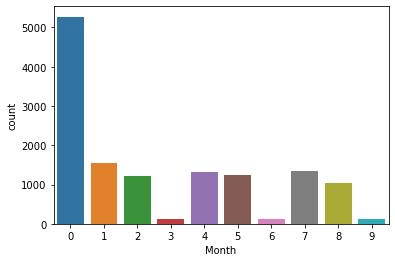

In [66]:
sns.countplot(df.Month)
df['Month'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    8081
1    5273
Name: Year, dtype: int64

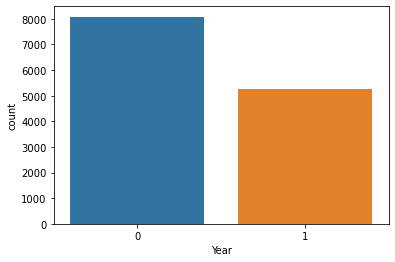

In [67]:
sns.countplot(df.Year)
df['Year'].value_counts()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2    5682
3    3581
0    2752
4     883
1     456
Name: Source, dtype: int64

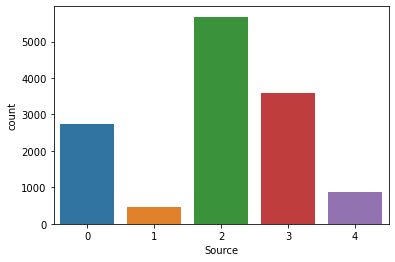

In [68]:
sns.countplot(df.Source)
df['Source'].value_counts()

Now we are done with the EDA analysis. We will now proceed to splitting the data and training the model

In [69]:
#splitting the data
x=df.drop('Price',axis=1)
y=df['Price']

In [70]:
x.shape

(13354, 14)

In [71]:
y.shape

(13354,)

In [72]:
#training the data 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression 

In [73]:
lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state {i},the training accuracy is = {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is = {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is = 0.29821362495657144
At random state 0,the testing accuracy is = 0.3006707067985702


At random state 1,the training accuracy is = 0.30320980830545274
At random state 1,the testing accuracy is = 0.2802102181286752


At random state 2,the training accuracy is = 0.2991066573592823
At random state 2,the testing accuracy is = 0.2969453651013426


At random state 3,the training accuracy is = 0.29892920600932527
At random state 3,the testing accuracy is = 0.29735037425448996


At random state 4,the training accuracy is = 0.3002398145007965
At random state 4,the testing accuracy is = 0.2917567212071771


At random state 5,the training accuracy is = 0.3042423999264703
At random state 5,the testing accuracy is = 0.27896666084333543


At random state 6,the training accuracy is = 0.30218583902423235
At random state 6,the testing accuracy is = 0.285354413065679


At random state 7,the training accuracy is = 0.2936131050085603
At random state 7,the testin

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=49)

In [75]:
pred_test=lr.predict(x_test)

In [76]:
pred_train=lr.predict(x_train)

In [77]:
print(r2_score(y_test,pred_test)*100)

31.14163466074553


In [78]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [79]:
pred_test=lr.predict(x_test)
pred_test

array([11074.29207992,  6892.37987079, 10732.51657013, ...,
       10454.82411895,  9722.59001034, 12355.77949999])

In [80]:
pred_train=lr.predict(x_train)
pred_train

array([ 6693.93430403,  6681.211204  , 11558.22636654, ...,
       11850.39859236, 10326.58156643,  7446.9376778 ])

In [81]:
lr_accuracy=round(lr.score(x_train,y_train)*100)
lr_accuracy

30

In [82]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15, min_samples_leaf=2)
tree.fit(x_train,y_train)
tree_pred=tree.predict(x_test)
tree_pred

array([11102.        ,  7518.1122449 , 10262.        , ...,
       10759.27272727, 13246.27272727, 16494.2       ])

In [83]:
tree_accuracy=round(tree.score(x_train,y_train)*100)
tree_accuracy

93

In [84]:
from sklearn.ensemble import RandomForestRegressor 
rf=RandomForestRegressor(n_estimators=400,max_depth=6,min_samples_leaf=2,n_jobs=4)
rf.fit(x_train,y_train)
rf.pred=rf.predict(x_test)

In [85]:
rf_accuracy=round(rf.score(x_train,y_train)*100)
rf_accuracy

75

In [86]:
import xgboost
from xgboost import XGBRegressor

model=XGBRegressor(n_estimators=100,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [87]:
y_pred=model.predict(x_test)
y_pred

array([10077.452,  6870.842, 10480.424, ...,  8404.802, 11784.285,
       10904.32 ], dtype=float32)

In [88]:
model.score(x_train,y_train)*100

87.83817574095

In [89]:
model_accuracy=round(model.score(x_train,y_train)*100)
model_accuracy

88

In [90]:
#Cross validation  for desisiontree
scr=cross_val_score(tree,x,y,cv=5)
scr.mean()
print("Cross validation score of DecisionTreeRegression:",scr.mean())

Cross validation score of DecisionTreeRegression: 0.6416979298314102


In [91]:
#Cross validation  for xgboost
scr=cross_val_score(model,x,y,cv=5)
scr.mean()
print("Cross validation score of Xgboost:",scr.mean())

Cross validation score of Xgboost: 0.6601606116981088


From the above, we can tell that Decision Tree Regressor gives us the bet model for  our prediction. Hence we are saving it as the final regression.

In [92]:
#saving the model
import pickle 
filename='churn.pkl'
pickle.dump(tree,open(filename,'wb'))

In [93]:
loaded_model=pickle.load(open('churn.pkl','rb'))
result=loaded_model.score(x_test,y_test)*100
result

81.65210409251688

In [94]:
#creatig a new df
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_train[:]],index=["Predicted","Original"])

In [95]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,10673,10674,10675,10676,10677,10678,10679,10680,10681,10682
Predicted,11102.000000,7518.112245,10262.000000,15457.060606,7794.886364,16984.000000,13089.608696,7064.000000,3490.500000,17633.428571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Original,6693.934304,6681.211204,11558.226367,10348.900988,6193.789090,7985.960105,5541.237965,6108.041424,10599.550391,10615.622574,...,9594.675282,10110.203777,9159.799994,12688.068225,10560.053679,10693.467718,10448.559046,11850.398592,10326.581566,7446.937678
